### Models Experimented
- SVM
- ANN
- CNN
- Decision Tree/Random Forest

### Dataset preparation

The dataset used: https://web.cecs.pdx.edu/~singh/rcyc-web/dataset.html
(From Portland State University)

This dataset contains 11,500 images of 5 common recycling items.

In [ ]:
# Open up the training data
import numpy as np
np.random.seed(42)
import pandas as pd

def unwrap(file):
  with open(file, 'rb') as fo:
    data = np.load(file)
  x, y = data['x'], data['y']
  return x, y

# Note to extract files: run tar -xvzf ./recycled_32.tar.gz (Windows)
X_test, y_test = unwrap('recycled_32_test.npz')
X_train_full, y_train_full = unwrap('recycled_32_train.npz')

In [ ]:
from sklearn.model_selection import train_test_split

# Split training set into training data and validation data
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size= 0.1, random_state=49)

In [ ]:
# Dataset split sizes
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(9000, 3, 32, 32)
(1000, 3, 32, 32)
(1500, 3, 32, 32)


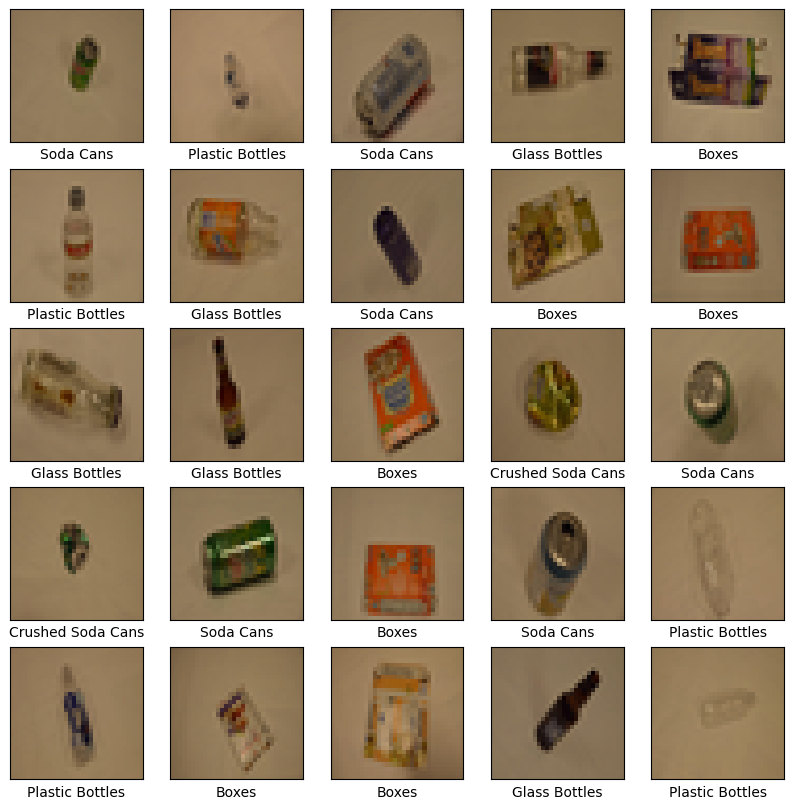

In [ ]:
import matplotlib.pyplot as plt
from skimage import io

class_names = ['Boxes', 'Glass Bottles', 'Soda Cans', 'Crushed Soda Cans', 'Plastic Bottles']

# Display some sample images from training set
plt.figure(figsize=(10, 10))
for i in range(25):
  plt.subplot(5, 5, i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  # io.imshow(X_train[i].reshape(-1, 32, 32))
  plt.imshow(X_train[i].reshape(32, 32, -1))
  plt.xlabel(class_names[y_train[i]])

In [ ]:
# Import necessary libraries shared across models
import tensorflow as tf
from tensorflow import keras

### Preparation of outside-of-training images - for proof of concept

In [ ]:
import cv2
materials = ['paper', 'metal', 'glass', 'plastic']
paper_no = [592, 593]
glass_no = [11, 7]
metal_no = [14, 3]
plastic_no = [11, 5, 8]
images = []
labels = []
for mat in materials:
  if mat == "paper":
    for no in paper_no:
      labels.append(mat)
      filename = f"{mat}{str(no)}.jpg"
      print(filename)
      images.append(cv2.resize(cv2.imread(filename),(32, 32)))
  elif mat == "metal":
    for no in metal_no:
      filename = f"{mat}{str(no)}.jpg"
      images.append(cv2.resize(cv2.imread(filename),(32, 32)))
      labels.append(mat)
  elif mat == "glass":
    for no in glass_no:
      filename = f"{mat}{str(no)}.jpg"
      images.append(cv2.resize(cv2.imread(filename),(32, 32)))
      labels.append(mat)
  elif mat == "plastic":
    for no in plastic_no:
      filename = f"{mat}{str(no)}.jpg"
      images.append(cv2.resize(cv2.imread(filename),(32, 32)))
      labels.append(mat)

image_list = np.array(images)
print(image_list.shape)
image_list_transposed = np.transpose(image_list, (0, 3, 1, 2))
image_list_transposed.shape

In [ ]:
print(labels)
outide_images = [0, 0, 2, 2, 1, 1, 4, 4, 4]

['paper', 'paper', 'metal', 'metal', 'glass', 'glass', 'plastic', 'plastic', 'plastic']


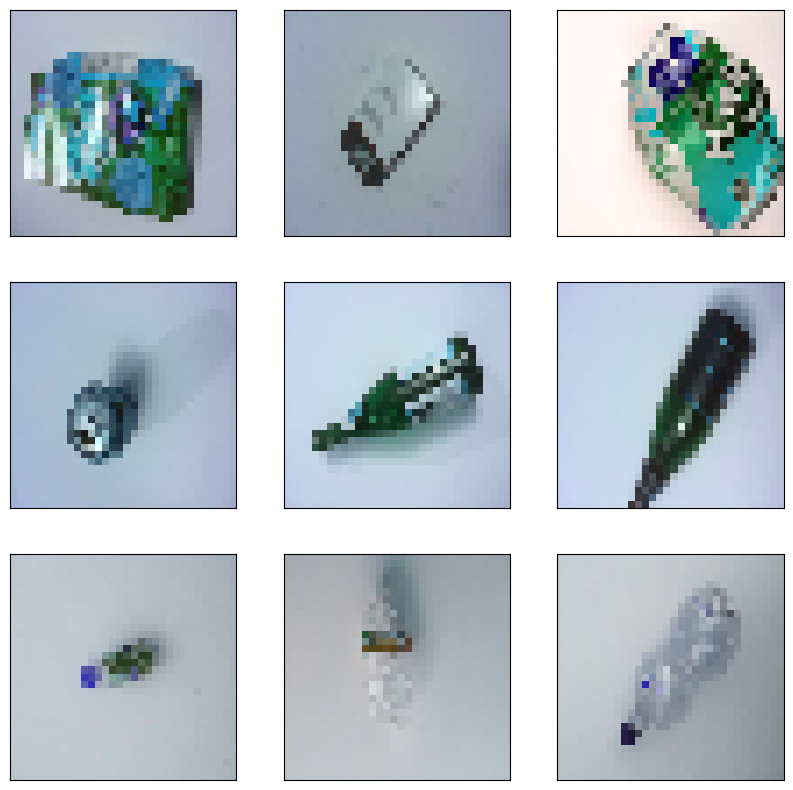

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(9):
  plt.subplot(3, 3, i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  # io.imshow(X_train[i].reshape(-1, 32, 32))
  plt.imshow(image_list[i].reshape(32, 32, -1))
  #plt.xlabel(class_names[y_train[i]])

Note that the images in the dataset used are 32 x 32 px with 3 channels (RGB).

## ANN Multilayer-Perceptron Implementation

In [ ]:
# ANN
model = keras.Sequential([
    keras.layers.Flatten(input_shape=[3, 32, 32]),
    keras.layers.Dense(2048, activation='relu'),
    keras.layers.Dense(1024, activation='relu'),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(5, activation='softmax')
])

checkpoint_cb_ann = tf.keras.callbacks.ModelCheckpoint("ml4va_ann.h5", save_best_only=True)

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), callbacks=[checkpoint_cb_ann])
model.evaluate(X_test, y_test)

Epoch 1/100
282/282 [==============================] - 8s 6ms/step - loss: 41.9505 - accuracy: 0.3142 - val_loss: 1.3667 - val_accuracy: 0.4150
Epoch 2/100
282/282 [==============================] - 2s 6ms/step - loss: 1.1952 - accuracy: 0.5084 - val_loss: 1.2119 - val_accuracy: 0.5270
Epoch 3/100
282/282 [==============================] - 2s 6ms/step - loss: 1.1663 - accuracy: 0.5201 - val_loss: 1.4044 - val_accuracy: 0.4760
Epoch 4/100
282/282 [==============================] - 1s 5ms/step - loss: 1.0837 - accuracy: 0.5543 - val_loss: 1.0699 - val_accuracy: 0.5800
Epoch 5/100
282/282 [==============================] - 1s 5ms/step - loss: 1.0667 - accuracy: 0.5649 - val_loss: 1.1709 - val_accuracy: 0.5410
Epoch 6/100
282/282 [==============================] - 1s 5ms/step - loss: 1.0648 - accuracy: 0.5612 - val_loss: 1.0994 - val_accuracy: 0.5630
Epoch 7/100
282/282 [==============================] - 1s 4ms/step - loss: 1.0388 - accuracy: 0.5731 - val_loss: 1.1227 - val_accuracy: 0.540

[0.7385563850402832, 0.7246666550636292]

In [ ]:
ann_model = tf.keras.models.load_model("ml4va_ann.h5")
ann_model.evaluate(X_test, y_test)

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('ANN Model Accuracy per Training Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Set', 'Validation Set'], loc='upper left')
plt.show()

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('ANN Model Loss per Training Epoch')
plt.ylabel('Categorical Cross Entropy Loss')
plt.xlabel('Epoch')
plt.legend(['Training Set', 'Validation Set'], loc='upper left')
plt.show()

In [ ]:
test_predictions = model.predict(X_test)
class_predictions = np.argmax(test_predictions, axis=-1)
class_predictions

In [ ]:
loss_taking_prob = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)
prediction_loss = loss_taking_prob(y_test, test_predictions)
prediction_loss

<Axes: >

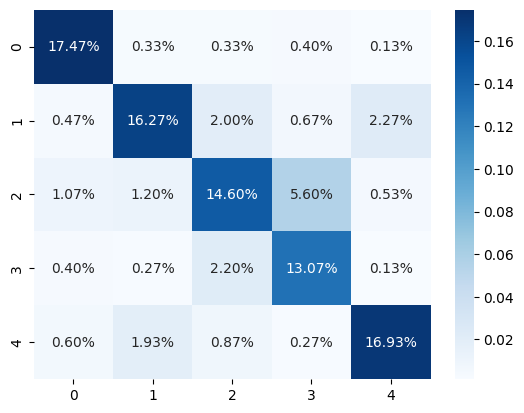

In [ ]:
import seaborn as sns
ann_confusion = confusion_matrix(class_predictions, y_test)
sns.heatmap(ann_confusion/np.sum(ann_confusion), annot=True,
            fmt='.2%', cmap='Blues')

<Axes: >

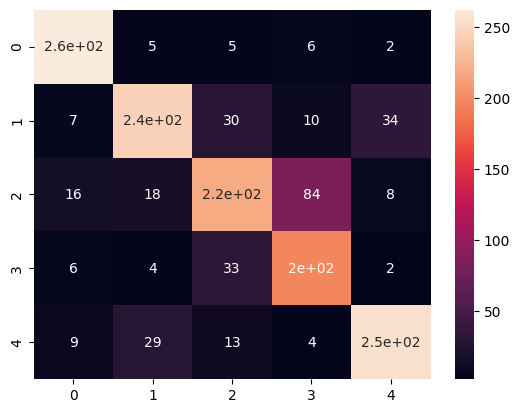

In [ ]:
sns.heatmap(ann_confusion, annot=True)

## SVM Implementation

In [ ]:
# SVM for image recognition and deciding between trash & recylables
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Transform data
X_train = np.array(X_train).reshape(len(X_train), -1)
X_test = np.array(X_test).reshape(len(X_test), -1)

# Instantiate model and fit
svm = svm.SVC()
svm.fit(X_train, y_train) # takes around 1m 30s to train
y_pred = svm.predict(X_test)
print("Accuracy: ", accuracy_score(y_pred, y_test))
class_report = classification_report(y_pred, y_test)
print(class_report)

Accuracy:  0.806
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       306
           1       0.77      0.75      0.76       305
           2       0.68      0.76      0.72       270
           3       0.83      0.79      0.81       315
           4       0.83      0.82      0.83       304

    accuracy                           0.81      1500
   macro avg       0.81      0.80      0.80      1500
weighted avg       0.81      0.81      0.81      1500



In [ ]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
svm_grid = {'C': [0.001, 0.1, 1, 10, 100],
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['rbf']}

svm_grid_search = GridSearchCV(svm.SVC(), svm_grid, refit = True, verbose = 3)
svm_grid_search.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import confusion_matrix

# Display SVM confusion matrix
svm_confusion = confusion_matrix(y_pred, y_test)
svm_confusion

array([[275,   9,   7,  10,   5],
       [  7, 230,  24,  10,  34],
       [  6,  20, 205,  30,   9],
       [  9,   4,  51, 249,   2],
       [  3,  37,  13,   1, 250]])

<Axes: >

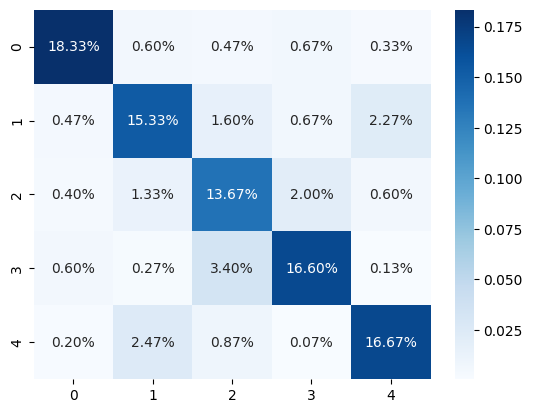

In [ ]:
sns.heatmap(svm_confusion/np.sum(svm_confusion), annot=True,
            fmt='.2%', cmap='Blues')

<Axes: >

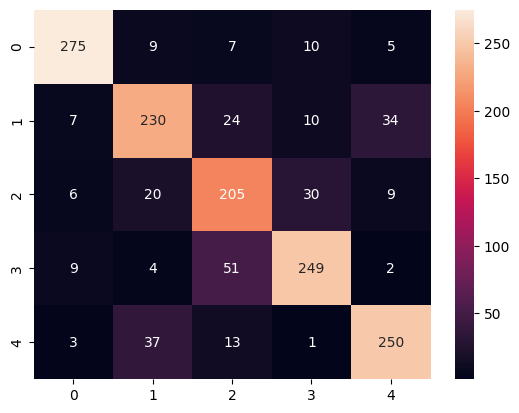

In [ ]:
sns.heatmap(svm_confusion, annot=True, fmt='g')

## CNN Implementation

In [ ]:
# Convolutional Neural Net for image recognition and deciding between trash & recyclabes
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, kernel_size=(7, 7), activation='relu', padding='same', input_shape=[32, 32, 3]))
model.add(tf.keras.layers.Conv2D(32, 3, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Conv2D(16, 3, activation='relu', padding='same'))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Conv2D(16, 3, activation='relu'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(5, activation='softmax'))

print(model.summary())

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_50 (Conv2D)          (None, 32, 32, 32)        4736      
                                                                 
 conv2d_51 (Conv2D)          (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d_30 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_52 (Conv2D)          (None, 15, 15, 16)        4624      
                                                                 
 max_pooling2d_31 (MaxPooli  (None, 7, 7, 16)          0         
 ng2D)                                                           
                                                                 
 conv2d_53 (Conv2D)          (None, 5, 5, 16)        

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics='accuracy')

X_train = X_train.reshape(len(X_train), 32, 32, 3)
X_val = X_val.reshape(len(X_val), 32, 32, 3)
X_test = X_test.reshape(len(X_test), 32, 32, 3)

checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("ml4va_cnn.h5", save_best_only=True)
# early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=15, restore_best_weights=True)

history_custom_cnn = model.fit(X_train, y_train, epochs=200, validation_data=(X_val, y_val),
          callbacks=[checkpoint_cb]) # training time roughly 6m 30s

Epoch 1/200
282/282 [==============================] - 7s 9ms/step - loss: 1.8963 - accuracy: 0.2808 - val_loss: 2.2831 - val_accuracy: 0.1890
Epoch 2/200
282/282 [==============================] - 2s 8ms/step - loss: 1.6043 - accuracy: 0.3193 - val_loss: 2.7220 - val_accuracy: 0.1890
Epoch 3/200
282/282 [==============================] - 3s 9ms/step - loss: 1.4423 - accuracy: 0.3723 - val_loss: 2.0519 - val_accuracy: 0.2220
Epoch 4/200
282/282 [==============================] - 3s 10ms/step - loss: 1.3243 - accuracy: 0.4336 - val_loss: 1.6529 - val_accuracy: 0.2500
Epoch 5/200
282/282 [==============================] - 2s 8ms/step - loss: 1.2556 - accuracy: 0.4678 - val_loss: 1.1810 - val_accuracy: 0.4850
Epoch 6/200
282/282 [==============================] - 2s 8ms/step - loss: 1.2009 - accuracy: 0.5016 - val_loss: 1.9975 - val_accuracy: 0.3200
Epoch 7/200
282/282 [==============================] - 2s 7ms/step - loss: 1.1264 - accuracy: 0.5426 - val_loss: 1.2244 - val_accuracy: 0.421

In [ ]:
model.evaluate(X_test, y_test)

47/47 [==============================] - 0s 3ms/step - loss: 0.3016 - accuracy: 0.9013


[0.30162298679351807, 0.9013333320617676]

In [ ]:
#NOTE: Only run this cell after training the network (should have downloaded the .h5 file)
custom_cnn_model = tf.keras.models.load_model("ml4va_cnn.h5")
custom_cnn_model.evaluate(X_test, y_test)

47/47 [==============================] - 0s 3ms/step - loss: 0.2499 - accuracy: 0.9033


[0.2499452382326126, 0.903333306312561]

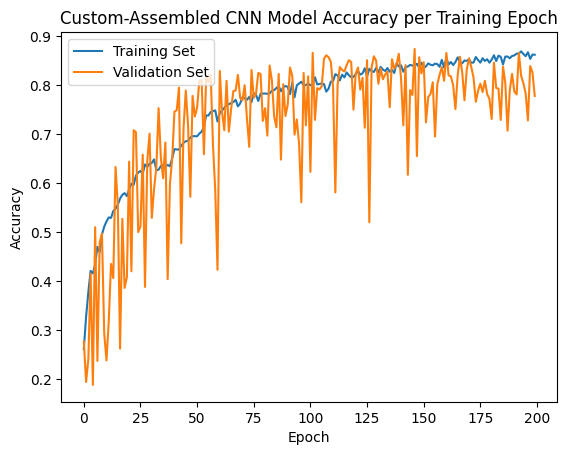

In [ ]:
plt.plot(history_custom_cnn.history['accuracy'])
plt.plot(history_custom_cnn.history['val_accuracy'])
plt.title('Custom-Assembled CNN Model Accuracy per Training Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Set', 'Validation Set'], loc='upper left')
plt.show()

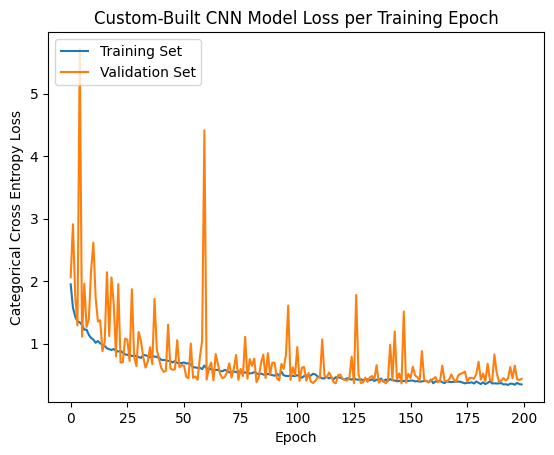

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history_custom_cnn.history['loss'])
plt.plot(history_custom_cnn.history['val_loss'])
plt.title('Custom-Built CNN Model Loss per Training Epoch')
plt.ylabel('Categorical Cross Entropy Loss')
plt.xlabel('Epoch')
plt.legend(['Training Set', 'Validation Set'], loc='upper left')
plt.show()

In [ ]:
X_test_cnn = X_test.reshape(len(X_test), 32, 32, 3)

In [ ]:
test_predictions = custom_cnn_model.predict(X_test_cnn)
class_predictions = np.argmax(test_predictions, axis=-1)

loss_taking_prob = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)
prediction_loss = loss_taking_prob(y_test, test_predictions)
prediction_loss

47/47 [==============================] - 0s 6ms/step


<tf.Tensor: shape=(), dtype=float32, numpy=0.37330073>

In [ ]:
class_report = classification_report(class_predictions, y_test)
print(class_report)

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       308
           1       0.88      0.90      0.89       291
           2       0.92      0.74      0.82       370
           3       0.72      0.92      0.81       236
           4       0.89      0.91      0.90       295

    accuracy                           0.88      1500
   macro avg       0.88      0.89      0.88      1500
weighted avg       0.89      0.88      0.88      1500



In [ ]:
custom_cnn_confusion = confusion_matrix(class_predictions, y_test)
custom_cnn_confusion

array([[295,   2,   1,   2,   8],
       [  0, 263,   6,   0,  22],
       [  0,  11, 275,  81,   3],
       [  3,   0,  16, 217,   0],
       [  2,  24,   2,   0, 267]])

<Axes: >

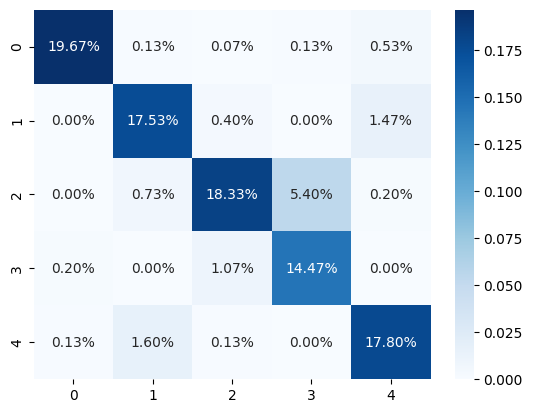

In [ ]:
sns.heatmap(custom_cnn_confusion/np.sum(custom_cnn_confusion), annot=True,
            fmt='.2%', cmap='Blues')

<Axes: >

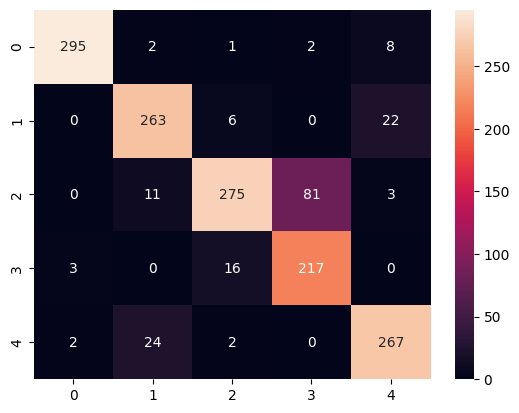

In [ ]:
sns.heatmap(custom_cnn_confusion, annot=True, fmt='g')

In [ ]:
# Pre-trained CNN EfficientNetV2S for image recognition and deciding between trash & recyclabes
base = tf.keras.applications.EfficientNetV2S(weights="imagenet", include_top=False, input_shape=(32, 32, 3))
avg = tf.keras.layers.GlobalAveragePooling2D()(base.output)
pretrained_model = tf.keras.layers.Dense(256, activation='relu')(avg)
pretrained_model = tf.keras.layers.BatchNormalization()(pretrained_model)
pretrained_model = tf.keras.layers.Dropout(0.5)(pretrained_model)
output = tf.keras.layers.Dense(5, activation='softmax')(pretrained_model)
pretrained_model = tf.keras.Model(inputs=base.input, outputs=output)
pretrained_model.summary()
print("Model layers: ", len(pretrained_model.layers))

82420632/82420632 [==============================] - 4s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 32, 32, 3)            0         ['input_1[0][0]']             
                                                                                                  
 stem_conv (Conv2D)          (None, 16, 16, 24)           648       ['rescaling[0][0]']           
                                                                                                  
 stem_bn (BatchNormalizatio  (None, 16, 16, 24)           96        ['stem_conv[0][0]']           
 n)                          

In [ ]:
# Freeze pre-trained weights and train top layer
for layer in base.layers:
  layer.trainable = False

pretrained_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics='accuracy')

pretrained_model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
282/282 [==============================] - 25s 35ms/step - loss: 0.8190 - accuracy: 0.6984 - val_loss: 0.8686 - val_accuracy: 0.5840
Epoch 2/10
282/282 [==============================] - 7s 24ms/step - loss: 0.6065 - accuracy: 0.7693 - val_loss: 1.0037 - val_accuracy: 0.6490
Epoch 3/10
282/282 [==============================] - 6s 20ms/step - loss: 0.5712 - accuracy: 0.7801 - val_loss: 0.5925 - val_accuracy: 0.7450
Epoch 4/10
282/282 [==============================] - 6s 23ms/step - loss: 0.5453 - accuracy: 0.7978 - val_loss: 0.6788 - val_accuracy: 0.7590
Epoch 5/10
282/282 [==============================] - 8s 27ms/step - loss: 0.5187 - accuracy: 0.8094 - val_loss: 0.4892 - val_accuracy: 0.8150
Epoch 6/10
282/282 [==============================] - 10s 36ms/step - loss: 0.5254 - accuracy: 0.7993 - val_loss: 0.6870 - val_accuracy: 0.7240
Epoch 7/10
282/282 [==============================] - 6s 20ms/step - loss: 0.5038 - accuracy: 0.8100 - val_loss: 0.3964 - val_accuracy: 0.85

In [ ]:
# Unfreeze pre-trained weights and train whole model
for layer in base.layers:
  layer.trainable = True

pretrained_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics='accuracy')

checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("ml4va_cnn_pretr.h5", save_best_only=True)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

pretrained_model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val),
          callbacks=[checkpoint_cb, early_stopping_cb])


Epoch 1/100
282/282 [==============================] - ETA: 0s - loss: 0.7735 - accuracy: 0.7529

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


282/282 [==============================] - 113s 133ms/step - loss: 0.7735 - accuracy: 0.7529 - val_loss: 0.1814 - val_accuracy: 0.9340
Epoch 2/100
282/282 [==============================] - 32s 113ms/step - loss: 0.2697 - accuracy: 0.9117 - val_loss: 0.1095 - val_accuracy: 0.9600
Epoch 3/100
282/282 [==============================] - 34s 121ms/step - loss: 0.1723 - accuracy: 0.9436 - val_loss: 0.1034 - val_accuracy: 0.9660
Epoch 4/100
282/282 [==============================] - 32s 113ms/step - loss: 0.1180 - accuracy: 0.9622 - val_loss: 0.0445 - val_accuracy: 0.9870
Epoch 5/100
282/282 [==============================] - 46s 162ms/step - loss: 0.1473 - accuracy: 0.9580 - val_loss: 0.1610 - val_accuracy: 0.9500
Epoch 6/100
282/282 [==============================] - 31s 109ms/step - loss: 0.1404 - accuracy: 0.9566 - val_loss: 0.0403 - val_accuracy: 0.9900
Epoch 7/100
282/282 [==============================] - 30s 107ms/step - loss: 0.0542 - accuracy: 0.9830 - val_loss: 0.0431 - val_accura

In [ ]:
pretrained_model.evaluate(X_test, y_test)

47/47 [==============================] - 2s 39ms/step - loss: 0.0509 - accuracy: 0.9827


[0.050880320370197296, 0.9826666712760925]

In [ ]:
#NOTE: Only run this cell after training the network (should have downloaded the .h5 file)
pretrained_model = tf.keras.models.load_model("ml4va_cnn_pretr.h5")
pretrained_model.evaluate(X_test, y_test)

47/47 [==============================] - 4s 21ms/step - loss: 0.0509 - accuracy: 0.9827


[0.050880320370197296, 0.9826666712760925]

In [ ]:
#NOTE: might be better to only save the weights (.ckpt) instead of the entire model (easier to reload)
pretrained_model.save_weights("ml4va_cnn_pretr")

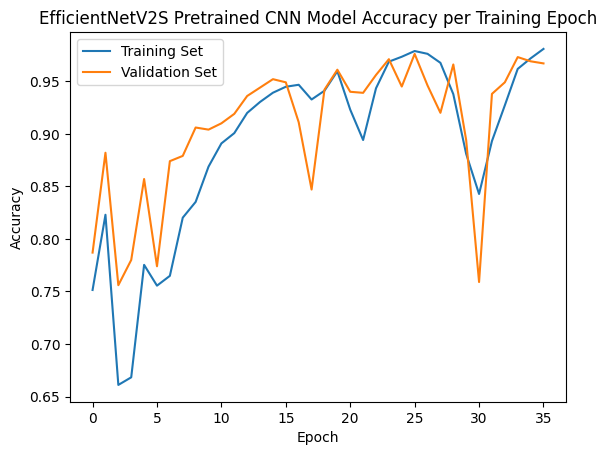

In [ ]:
plt.plot(pretrained_history.history['accuracy'])
plt.plot(pretrained_history.history['val_accuracy'])
plt.title('EfficientNetV2S Pretrained CNN Model Accuracy per Training Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Set', 'Validation Set'], loc='upper left')
plt.show()

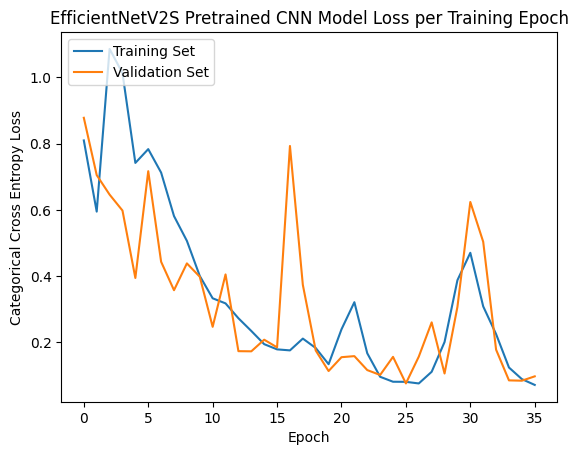

In [ ]:
from matplotlib import pyplot as plt
plt.plot(pretrained_history.history['loss'])
plt.plot(pretrained_history.history['val_loss'])
plt.title('EfficientNetV2S Pretrained CNN Model Loss per Training Epoch')
plt.ylabel('Categorical Cross Entropy Loss')
plt.xlabel('Epoch')
plt.legend(['Training Set', 'Validation Set'], loc='upper left')
plt.show()

In [ ]:
test_predictions_pretrained = pretrained_model.predict(X_test)
class_predictions_pretrained = np.argmax(test_predictions_pretrained, axis=-1)

loss_taking_prob = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)
prediction_loss_pretrained = loss_taking_prob(y_test, test_predictions_pretrained)
prediction_loss_pretrained

47/47 [==============================] - 6s 24ms/step


<tf.Tensor: shape=(), dtype=float32, numpy=0.097715646>

In [ ]:
class_report_pretrain = classification_report(class_predictions_pretrained, y_test)
print(class_report_pretrain)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       295
           1       0.97      0.98      0.97       297
           2       0.98      0.93      0.95       316
           3       0.92      0.97      0.95       285
           4       0.98      0.96      0.97       307

    accuracy                           0.97      1500
   macro avg       0.97      0.97      0.97      1500
weighted avg       0.97      0.97      0.97      1500



In [ ]:
pretrained_cnn_confusion = confusion_matrix(class_predictions_pretrained, y_test)
pretrained_cnn_confusion

array([[295,   0,   0,   0,   0],
       [  2, 290,   0,   0,   5],
       [  0,   0, 293,  23,   0],
       [  3,   0,   5, 277,   0],
       [  0,  10,   2,   0, 295]])

<Axes: >

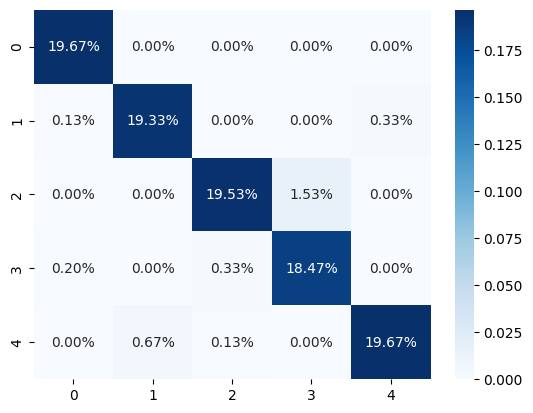

In [ ]:
sns.heatmap(pretrained_cnn_confusion/np.sum(pretrained_cnn_confusion), annot=True,
            fmt='.2%', cmap='Blues')

<Axes: >

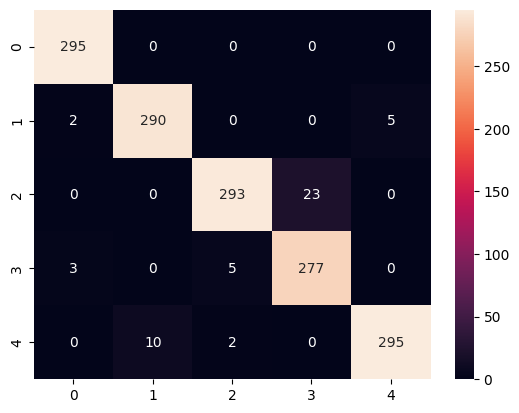

In [ ]:
sns.heatmap(pretrained_cnn_confusion, annot=True, fmt='g')

## Random Forest Implementation


In [ ]:
X_train_reshape = np.array(X_train).reshape(len(X_train), -1)
X_test_reshape = np.array(X_test).reshape(len(X_test), -1)

In [ ]:
X_train.shape

(9000, 3, 32, 32)

In [ ]:
X_test.shape

(1500, 3, 32, 32)

In [ ]:
y_train.shape

(9000,)

In [ ]:
nsamples, nx, ny, nz = X_train.shape
ndense = nx*ny*nz
X_train_reshaped = X_train.reshape((nsamples,ndense))

In [ ]:
nsamples_test = X_test.shape[0]
X_test_reshaped = X_test.reshape((nsamples_test, ndense))

In [ ]:
# Random Forest / Other Model for Image Classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Transform data
# X_train =

rf = RandomForestClassifier()

rf.fit(X_train_reshaped, y_train) # takes around 4m and 27 sec to finish fitting
y_pred = rf.predict(X_test_reshaped)
print("Accuracy: ", accuracy_score(y_pred, y_test))
print(classification_report(y_pred, y_test))

Accuracy:  0.816
              precision    recall  f1-score   support

           0       0.94      0.88      0.91       320
           1       0.81      0.79      0.80       306
           2       0.72      0.75      0.73       288
           3       0.81      0.78      0.79       309
           4       0.81      0.87      0.84       277

    accuracy                           0.82      1500
   macro avg       0.82      0.82      0.82      1500
weighted avg       0.82      0.82      0.82      1500



In [ ]:
from sklearn.model_selection import KFold, cross_val_score
cross_val_score(rf, X_train_reshaped, y_train, cv=10, scoring='neg_root_mean_squared_error')

array([-0.86409876, -0.91469485, -0.94692485, -0.79930525, -0.84787316,
       -0.80829038, -0.94044907, -0.89876458, -0.7986099 , -0.79512403])

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

random_grid = {'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
               'max_features': ['auto', 'sqrt'],
               'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4],
               'bootstrap': [True, False]
               }

forest_reg = RandomForestClassifier()
rand_search = RandomizedSearchCV(forest_reg, param_distributions=random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, scoring='neg_root_mean_squared_error')
rand_search.fit(X_train_reshaped, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time= 4.3min
[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time= 4.3min
[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time= 4.2min


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1600; total time= 5.9min


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1600; total time= 5.9min


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1600; total time= 5.9min
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=  30.1s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=  30.1s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=  30.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time= 2.6min


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time= 2.6min


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time= 2.6min


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=  30.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=  29.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=  30.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1200; total time= 3.3min


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1200; total time= 3.3min


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1200; total time= 3.3min
[CV] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time= 2.2min
[CV] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time= 2.2min
[CV] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time= 2.2min


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time= 2.4min


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time= 2.4min


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time= 2.4min


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1800; total time= 5.0min


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1800; total time= 4.9min


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1800; total time= 4.9min


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=2000; total time= 8.4min


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=2000; total time= 8.3min


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=2000; total time= 8.3min


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, scoring='neg_root_mean_squared_error',
                   verbose=2)

In [ ]:
all_results.param_n_estimators.unique()

array([1000, 1600, 200, 1200, 600, 1800, 2000], dtype=object)

In [ ]:
grid_search_grid = {
    'n_estimators': all_results.param_n_estimators.unique(),
    'max_features': all_results.param_max_features.unique(),
    'max_depth': all_results.param_max_depth.unique(),
    'min_samples_split': all_results.param_min_samples_split.unique(),
    'min_samples_leaf': all_results.param_min_samples_leaf.unique(),
    'bootstrap': all_results.param_bootstrap.unique()
}
grid_search_grid

{'n_estimators': array([1000, 1600, 200, 1200, 600, 1800, 2000], dtype=object),
 'max_features': array(['sqrt', 'auto'], dtype=object),
 'max_depth': array([70, 90, 50, 80, 100, 20], dtype=object),
 'min_samples_split': array([10, 2, 5], dtype=object),
 'min_samples_leaf': array([1, 4, 2], dtype=object),
 'bootstrap': array([False, True], dtype=object)}

In [ ]:
from sklearn.model_selection import GridSearchCV
forest_reg = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(forest_reg, grid_search_grid, refit = True, verbose = 3,n_jobs=-1)
grid_search.fit(X_train_reshaped, y_train)

In [ ]:
final_rand_forest_model = rand_search.best_estimator_
y_pred = final_rand_forest_model.predict(X_test_reshaped)
print("Accuracy: ", accuracy_score(y_pred, y_test))
print(classification_report(y_pred, y_test))

Accuracy:  0.83
              precision    recall  f1-score   support

           0       0.95      0.90      0.93       314
           1       0.80      0.80      0.80       300
           2       0.71      0.77      0.74       278
           3       0.85      0.79      0.82       320
           4       0.84      0.88      0.86       288

    accuracy                           0.83      1500
   macro avg       0.83      0.83      0.83      1500
weighted avg       0.83      0.83      0.83      1500



In [ ]:
rf_confusion = confusion_matrix(y_pred, y_test)
rf_confusion

array([[284,  17,   2,  13,   5],
       [  1, 235,  26,  10,  29],
       [  4,  20, 209,  27,  13],
       [  8,   3,  56, 250,   3],
       [  3,  25,   7,   0, 250]])

<Axes: >

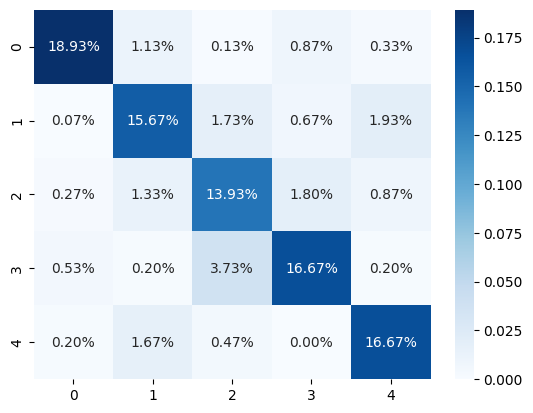

In [ ]:
sns.heatmap(rf_confusion/np.sum(rf_confusion), annot=True,
            fmt='.2%', cmap='Blues')

<Axes: >

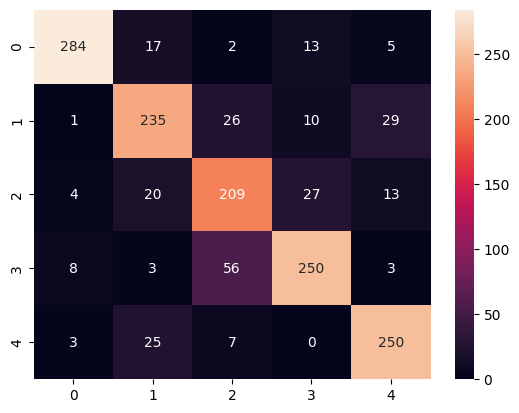

In [ ]:
sns.heatmap(rf_confusion, annot=True, fmt='g')

In [ ]:
!pip install joblib
import joblib
joblib.dump(final_rand_forest_model, "random_forest_svt.joblib")

['random_forest_svt.joblib']

In [ ]:
loaded_rf = joblib.load("random_forest_svt.joblib")
prd = loaded_rf.predict(X_test_reshaped)
print("Accuracy: ", accuracy_score(prd, y_test))
print(classification_report(prd, y_test))

Accuracy:  0.83
              precision    recall  f1-score   support

           0       0.95      0.90      0.93       314
           1       0.80      0.80      0.80       300
           2       0.71      0.77      0.74       278
           3       0.85      0.79      0.82       320
           4       0.84      0.88      0.86       288

    accuracy                           0.83      1500
   macro avg       0.83      0.83      0.83      1500
weighted avg       0.83      0.83      0.83      1500



## Test out-of-train images

In [ ]:
predictions_on_outside_imgs = pretrained_model.predict(image_list)
print(np.argmax(predictions_on_outside_imgs, axis=1))

1/1 [==============================] - 0s 96ms/step
[0 2 2 2 2 2 1 2 1]


In [ ]:
outide_images

[0, 0, 2, 2, 1, 1, 4, 4, 4]